In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset,DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,precision_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('heart_disease.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
X=df.drop('target',axis=1)
y=df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [5]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [6]:
train_ds=TensorDataset(X_train,y_train)
test_ds=TensorDataset(X_test,y_test)

In [7]:
from TabularNet import TabularModel

In [8]:
class Model(TabularModel):

    def __init__(self,in_size:int,layers:list,out_size:int,p=0.5):
        super().__init__()
        all_layers=[]
        for i in layers:
            all_layers.append(nn.Linear(in_size,i))
            all_layers.append(nn.ReLU())
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            in_size=i
        all_layers.append(nn.Linear(layers[-1],out_size))
        self.layers=nn.Sequential(*all_layers)
    
    def forward(self,X):
        return self.layers(X)

In [9]:
model=Model(11,[128,64,32],2)

In [10]:
lr=0.01
epochs=3

In [11]:
model.compile(loss_fn=nn.CrossEntropyLoss(),
              optimizer=torch.optim.Adam(model.parameters(),lr=lr),
              task='classification')

In [12]:
history=model.fit(epochs=epochs,
                  train_dataset=train_ds,
                  val_dataset=test_ds,
                  batch_size=64)

Training on cpu
Epoch [1], train_loss: 0.5492, val_loss: 0.3508, val_acc: 0.8782
Epoch [2], train_loss: 0.4266, val_loss: 0.2979, val_acc: 0.8866
Epoch [3], train_loss: 0.4184, val_loss: 0.3163, val_acc: 0.8739


In [13]:
model.performance(test_ds)

(0.8739495798319328,
 0.8739495798319328,
 0.8779172873661063,
 0.8779172873661063)

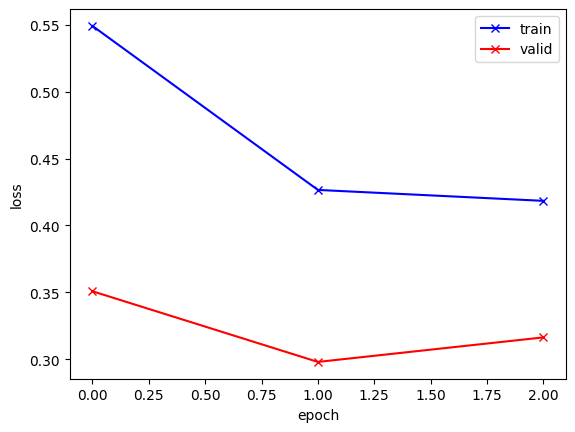

In [14]:
model.plot_losses()

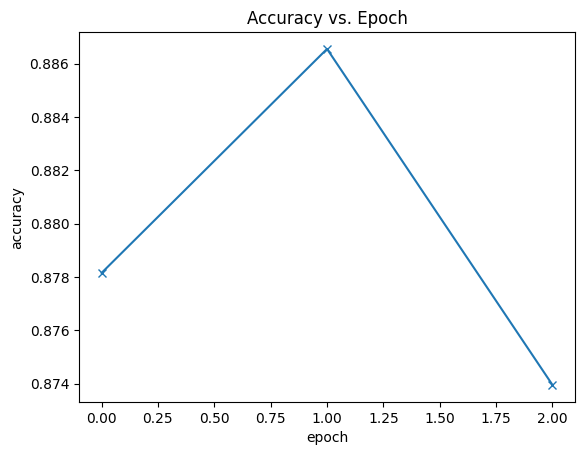

In [15]:
model.plot_accuracies()